### Autor: Johnny Rubio Pecasso
### Fecha: 04/sep/2024
### Introduccion a la ciencia de datos
### Notebook 04.10-Customizing-Ticks

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

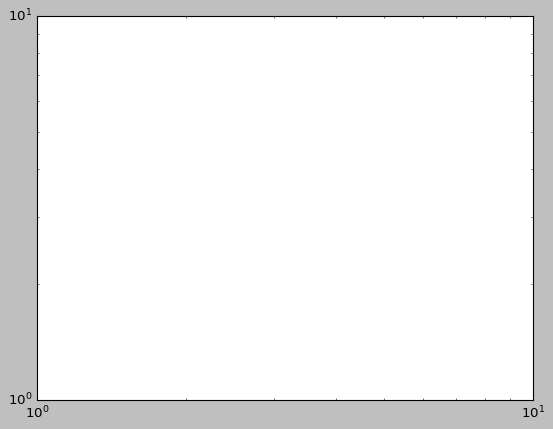

In [2]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

In [3]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [4]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

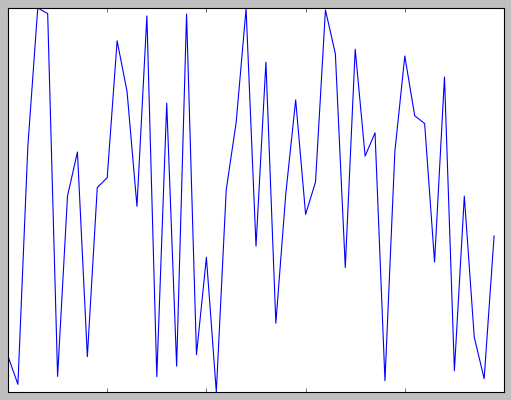

In [5]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\john_\scikit_learn_data


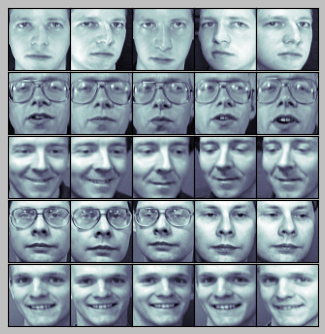

In [6]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

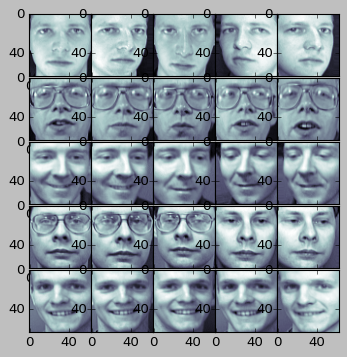

In [7]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

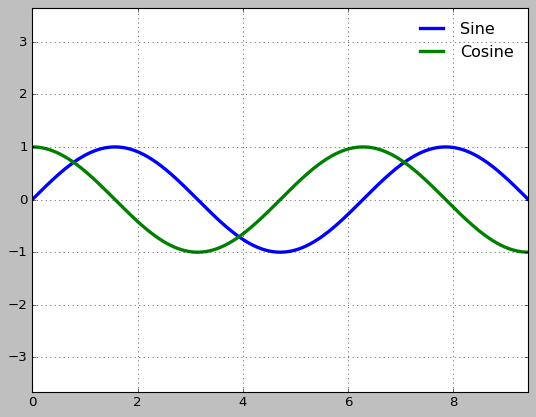

In [8]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

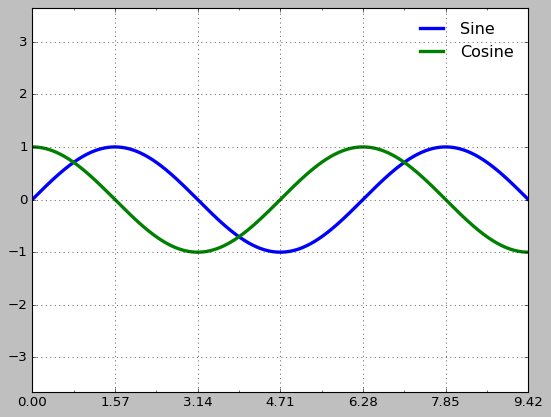

In [9]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

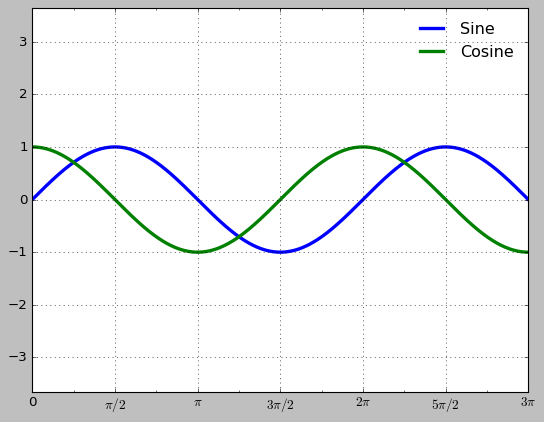

In [10]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig